<a href="https://colab.research.google.com/github/Tgoutam/skills-introduction-to-github/blob/main/Exploratory%20DA(with%20Ensemble).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q: Give an advanced example of AI doing exploratory data analysis(EDA) on data from a Kaggle source dataset using Python.

ChatGPT:
Below is an advanced example of performing exploratory data analysis (EDA) on a Kaggle dataset using Python. For this example, I'll use the "Titanic: Machine Learning from Disaster" dataset, which is a classic dataset used for classification tasks.

First, ensure you have the necessary packages installed. You can install them using:

In [1]:
pip install pandas numpy seaborn matplotlib scikit-learn


Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Set the default size of the plots
plt.rcParams['figure.figsize'] = (12, 6)


Step 2: Load the Dataset

In [3]:
# Ensure that Kaggle API credentials are set up
from google.colab import files
files.upload()  # Upload the kaggle.json file here

# Make directory for Kaggle and move kaggle.json there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [4]:
# Download the Titanic dataset from Kaggle
!kaggle competitions download -c titanic

# Unzip the dataset
!unzip titanic.zip


  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 48.7MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:
# Load the Titanic dataset from a CSV file
df = pd.read_csv("train.csv")
# Display the first few rows of the dataset
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Step 3: Preliminary Data Exploration

In [6]:
# Display the first few rows of the dataset
print(df.head())

# Display summary statistics of the dataset
print(df.describe(include='all'))

# Check for missing values
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

Step 4: Data Cleaning


In [7]:
# Fill missing values in 'Age' with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the most common port
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Fill missing values in 'Fare' with the median fare
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Drop the 'Cabin' column due to a large number of missing values
df.drop(columns=['Cabin'], inplace=True)


In [8]:
# Display the first few rows of the dataset
print(df.head())

# Display summary statistics of the dataset
print(df.describe(include='all'))

# Check for missing values
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  
        PassengerId    Survived      P

Step 5: Feature Engineering

In [9]:
# Create a new feature 'FamilySize' as a combination of 'SibSp' and 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create a new feature 'IsAlone'
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Extract titles from the 'Name' column and create a new feature 'Title'
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
                                    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')


In [10]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  IsAlone Title  
0      0         A/5 21171   7.2500        S           2        0    Mr  
1      0          PC 17599  71.2833        C           2        0   Mrs  
2      0  STON/O2. 3101282   7.9250        S           1        1  Miss  
3      0            1138

Step 6: Data Visualization

Distribution of Numerical Features

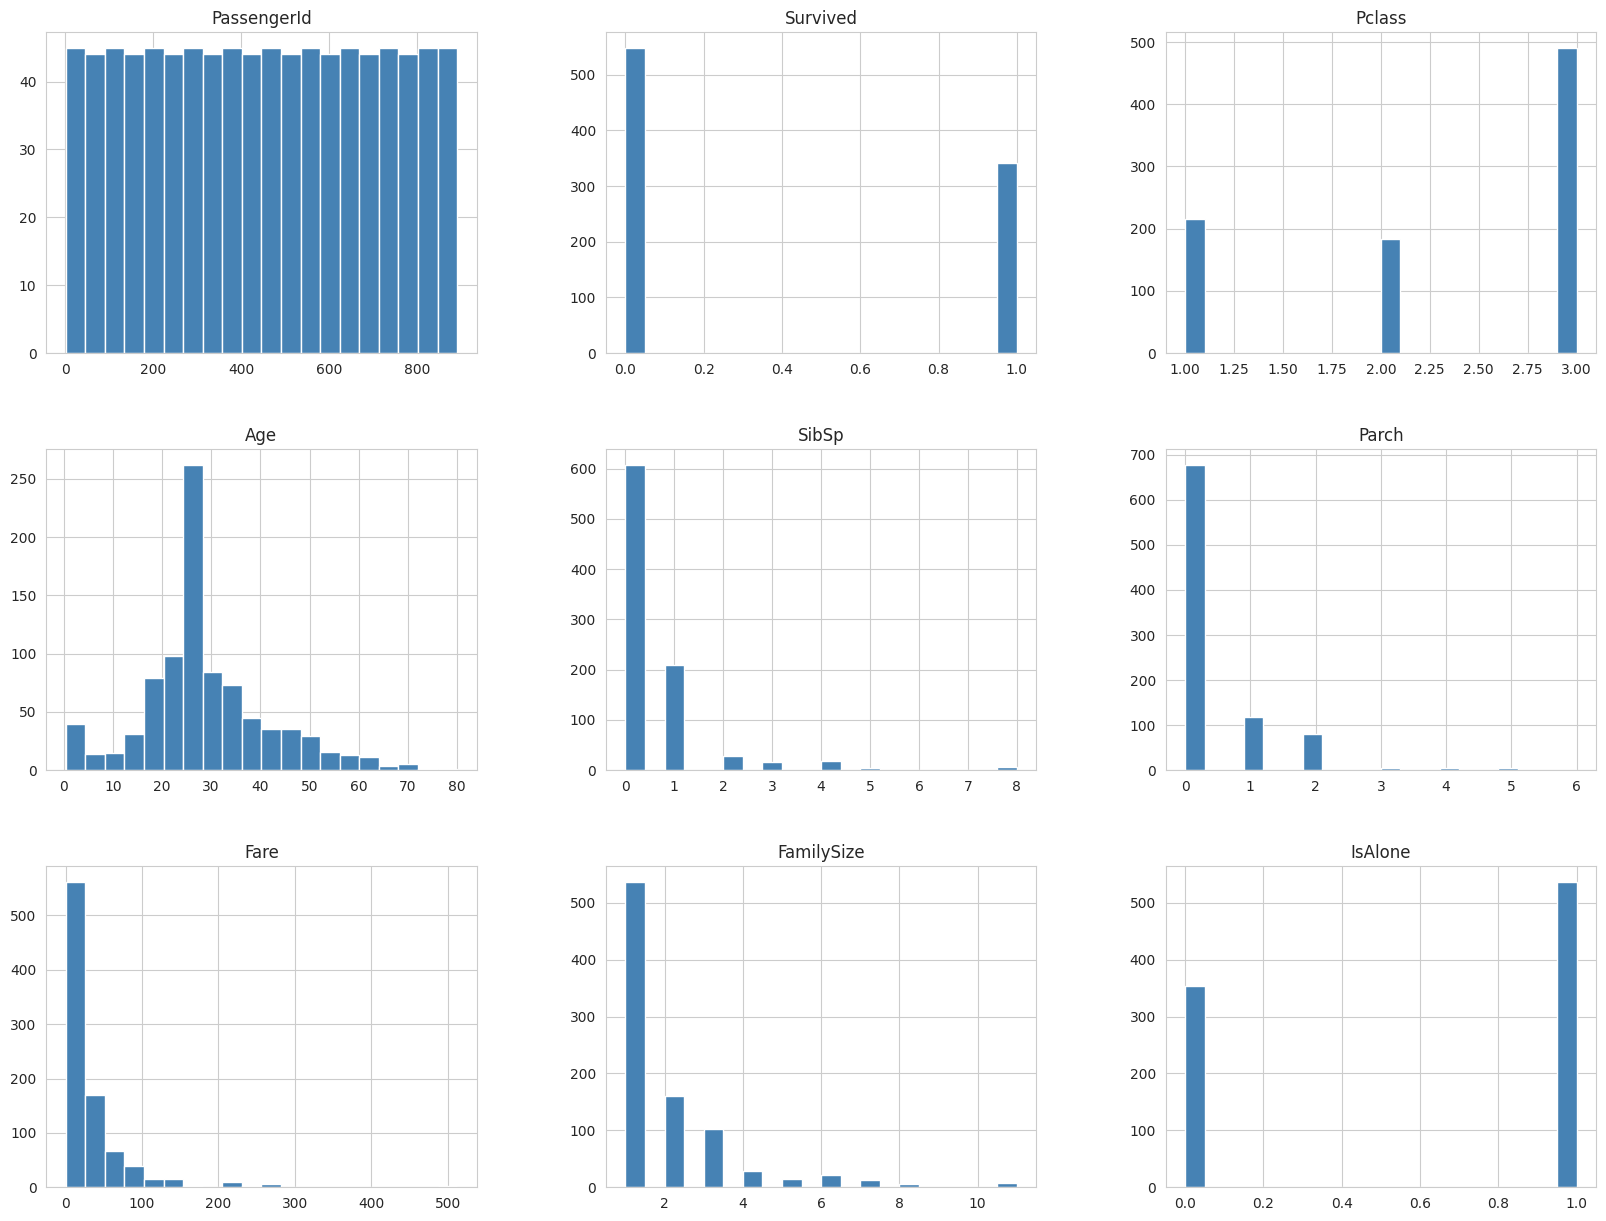

In [11]:
# Plot histograms of numerical features
df.hist(bins=20, figsize=(20, 15), color='steelblue')
plt.show()


Count Plots of Categorical Features

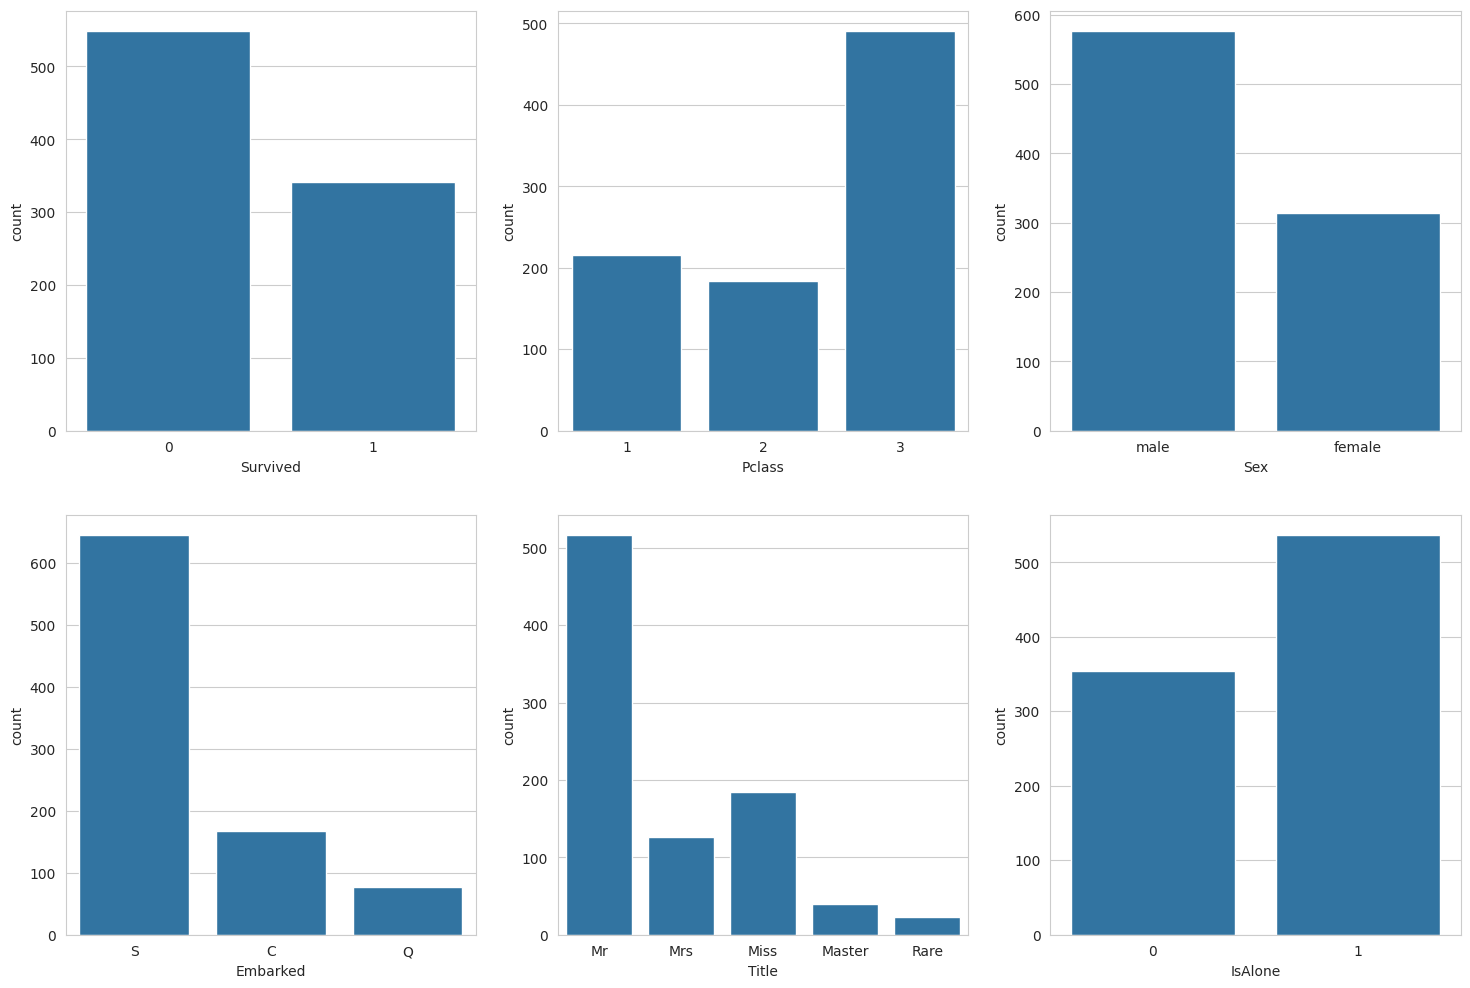

In [12]:
# Plot count plots of categorical features
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

sns.countplot(data=df, x='Survived', ax=axs[0, 0])
sns.countplot(data=df, x='Pclass', ax=axs[0, 1])
sns.countplot(data=df, x='Sex', ax=axs[0, 2])
sns.countplot(data=df, x='Embarked', ax=axs[1, 0])
sns.countplot(data=df, x='Title', ax=axs[1, 1])
sns.countplot(data=df, x='IsAlone', ax=axs[1, 2])

plt.show()


Correlation Matrix

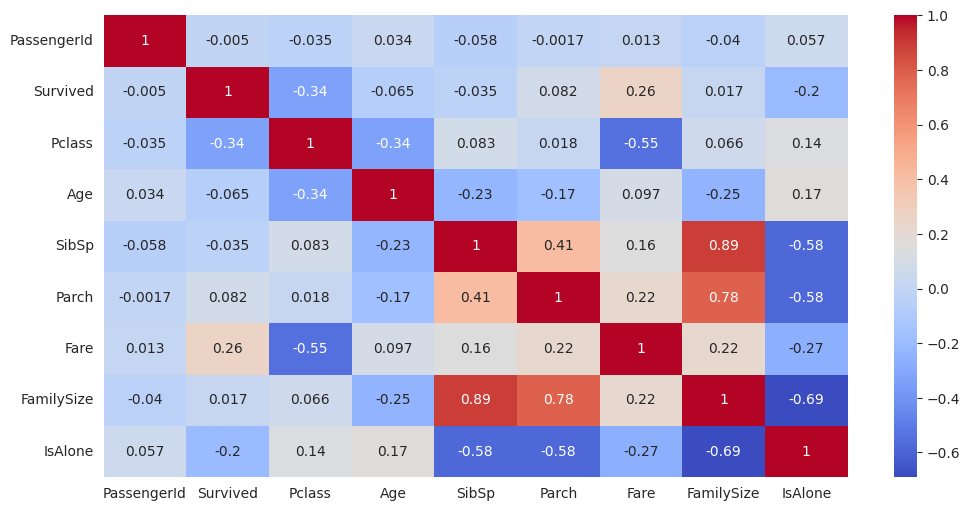

In [14]:
# Plot the correlation matrix
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Step 7: Insights and Advanced Visualizations
Survival Rate by Gender and Class

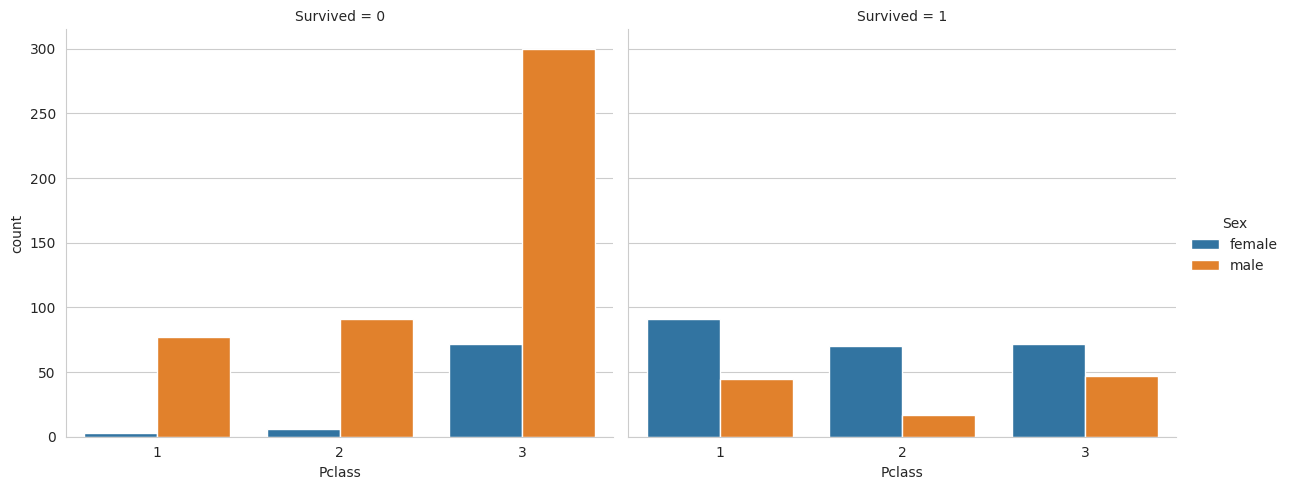

In [15]:
# Plot survival rate by gender and class
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count', height=5, aspect=1.2)
plt.show()


Age Distribution of Survived vs. Not Survived

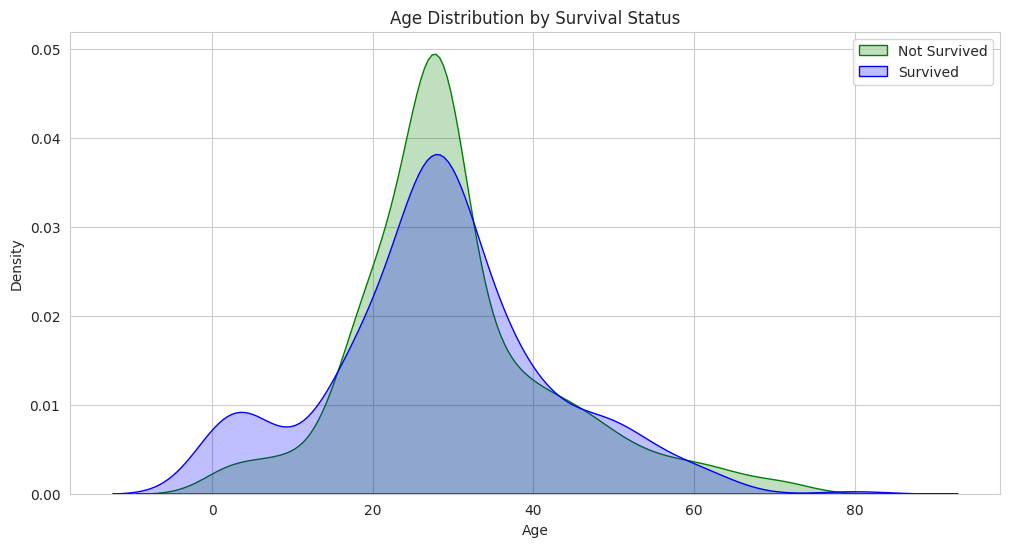

In [18]:
# Plot the age distribution of those who survived vs. those who did not
sns.kdeplot(df[df['Survived'] == 0]['Age'], fill=True, label='Not Survived', color='green')
sns.kdeplot(df[df['Survived'] == 1]['Age'], fill=True, label='Survived', color='blue')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Survival Status')
plt.legend()
plt.show()


Step 8: Encoding Categorical Features

In [19]:
# Encode categorical features as numerical
label_encoders = {}
for column in ['Sex', 'Embarked', 'Title']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Display the first few rows of the transformed dataset
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked  FamilySize  IsAlone  Title  
0         A/5 21171   7.2500         2           2        0      2  
1          PC 17599  71.2833         0           2        0      3  
2  STON/O2. 3101282   7.9250         2           1        1      1  
3            113803 

Step 9: Feature Importance

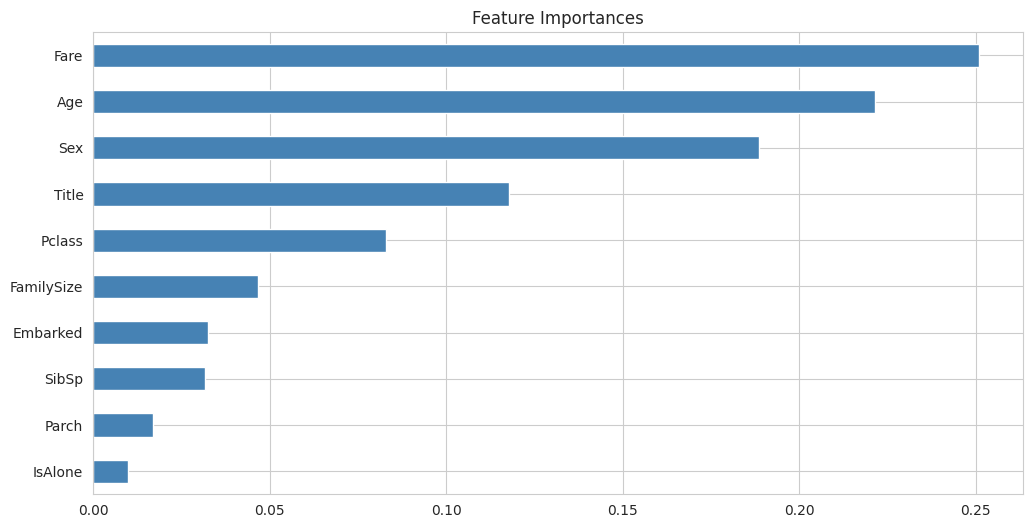

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Define the features and target variable
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = df['Survived']

# Train a RandomForestClassifier to evaluate feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Plot feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='steelblue')
plt.title('Feature Importances')
plt.show()


Step 10: Conclusion and Next Steps

Based on this exploratory data analysis, we can derive the following insights:

Gender and class have a significant impact on survival rates.
The 'Age' and 'Fare' distributions provide insights into survival probabilities.
Features like 'Title', 'FamilySize', and 'IsAlone' contribute significantly to predicting survival.

The next steps could involve further feature engineering, hyperparameter tuning, and model evaluation using cross-validation to improve the predictive performance of machine learning models.